In [1]:
from IPython.core.display import HTML
def css_styling():
    sheet = '../css/custom.css'
    styles = open(sheet, "r").read() 
    return HTML(styles)
css_styling()

# Python OOP 1: Basics and Initialisation

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def noisy_signal_generator(x, freq):
	"""creates a noisy sin signal with frequency freq

	Parameters
	----------
	x : array of float
	    signal x values
	freq : scalar
	    the signal frequency

	Returns
	-------
	y : array of float
	    array of sin(x * freq) plus a gaussian distributed noise
	"""
	noise = np.random.normal(0, 0.1, np.size(x))
	return np.sin(freq*x) + noise





/home/john/miniconda2/envs/py3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


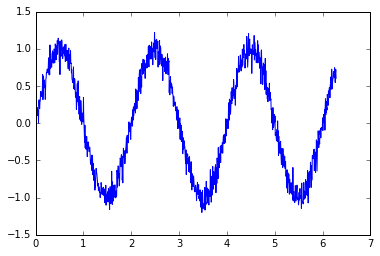

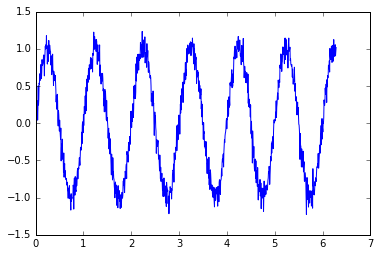

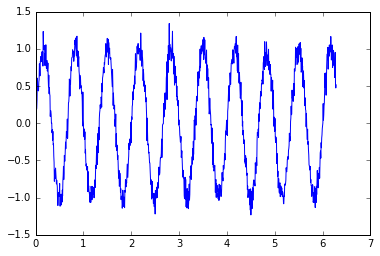

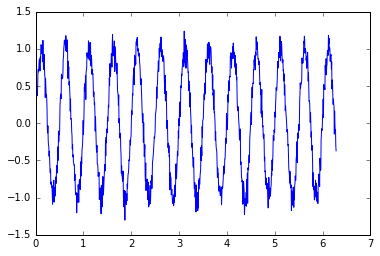

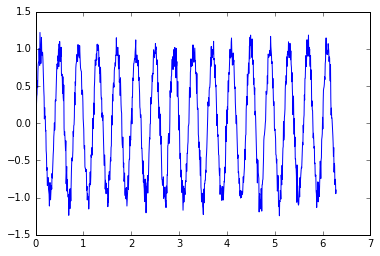

In [5]:
x = np.linspace(0, np.pi*2, 1024)
for i in range(1, 6):
    y = noisy_signal_generator(x, np.pi*i)
    data = np.vstack([x, y]).T
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y)
    fig.show()
    np.savetxt('ex3_signal_'+str(i), data)

In [6]:
x = np.linspace(-1,1)
y = np.sin(x)
np.savetxt('test.txt',[x,y])

In [7]:
class signal_load:
    def __init__(self,filename):
        self.data  = np.loadtxt(filename)
        self.x = self.data[:,0]
        self.y = self.data[:,1]
        self.clean = None
    def cleaner(self):
        self.clean = np.random.rand(len(self.y))*self.y
        return self.clean
    def plotter(self):
        #x,y,clean = self.x,self.y,self.clean
        fig = plt.figure()
        plt.plot(self.x,self.y)
        plt.plot(self.x,self.clean)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

In [8]:
i=1
#cl = signal_load()

In [9]:
import scipy.signal

In [10]:
import numpy

def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.

    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.

    input:
        x: the input signal
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal

    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)

    see also:

    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter

    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError, "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=numpy.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y

SyntaxError: invalid syntax (<ipython-input-10-e66a0a1bd1b0>, line 36)

In [11]:
cl = signal_load('ex3_signal_'+str(i))
plt.plot(smooth(smooth(cl.y,11,'flat')))

NameError: name 'smooth' is not defined

In [300]:
ft = np.fft.fft(cl.y)

In [301]:
f = np.fft.fftfreq(len(ft),cl.x[1] - cl.x[0])

In [308]:
def filter_rule(x,freq):
    band = 5
    if abs(freq)>i+band or abs(freq)<i-band:
        return 0
    else:
        return x

In [309]:
F_filtered = np.array([filter_rule(x,freq) for x,freq in zip(ft,f)])
s_filtered = np.fft.ifft(F_filtered)

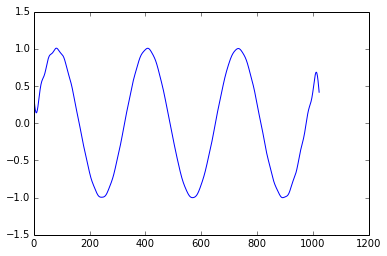

In [310]:
plt.plot(s_filtered)

In [311]:
import numpy as np
x = np.linspace(-5,5)